In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class_info_path = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv'
train_labes_path = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv'
dicom_photos_dir = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/'

In [3]:
class_df = pd.read_csv(class_info_path)
print("Number of records", class_df.shape[0])

Number of records 30227


In [4]:
print('Number of patients',class_df['patientId'].value_counts().shape[0])

Number of patients 26684


In [5]:
class_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [6]:
class_df.groupby('class').size()


class
Lung Opacity                     9555
No Lung Opacity / Not Normal    11821
Normal                           8851
dtype: int64

In [7]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


No null/NaN values in the dataset. We need to check for duplicates.

In [8]:
#number of duplicates in class_df dataframe
print("Number of duplicates", class_df.duplicated().sum())

#example of duplicates
class_df[class_df.duplicated(keep=False)].sort_values(by='patientId').head(4)

Number of duplicates 3543


,patientId,class
28990,000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
28991,000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
28992,000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
28993,000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity


However, we can not drop the duplicates as they are not actually duplicates. They are different images of the same patient taken at different angles or times We need to examine it later

Distribution of cases in the training set

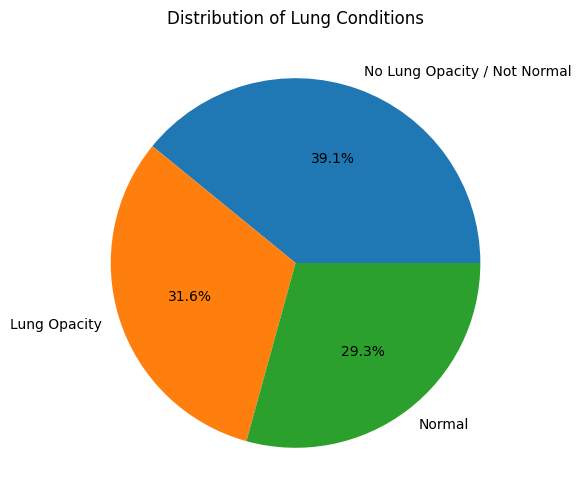

In [9]:
plt.figure(figsize=(10, 6))
plt.pie(class_df['class'].value_counts(), labels=class_df['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Lung Conditions')
plt.show()


Let's examine the train labels

In [10]:
labels_df = pd.read_csv("/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")
labels_df.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [11]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [12]:
print("Number of records", labels_df.shape[0])

Number of records 30227


In [13]:
print("Number of unique patients", labels_df['patientId'].value_counts().shape[0])

Number of unique patients 26684


Number of NaN values in the train labels. They are set to NaN if the corresponding patient does not have the disease. Convert them to 0 values

In [14]:
#Number of NaN values in the train labels
print("Number of NaN values", labels_df.isnull().sum())

Number of NaN values patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64


In [15]:
labels_df['x'] = labels_df['x'].fillna(0)
labels_df['y'] = labels_df['y'].fillna(0)
labels_df['width'] = labels_df['width'].fillna(0)
labels_df['height'] = labels_df['height'].fillna(0)

In [16]:
#Number of NaN values in the train labels
print("Number of NaN values", labels_df.isnull().sum())

Number of NaN values patientId    0
x            0
y            0
width        0
height       0
Target       0
dtype: int64


Coming back to the duplicates, let's examine them and we will see that they have different labels

In [17]:
labels_df[labels_df['patientId'] == labels_df[labels_df['patientId'].duplicated()]['patientId'].values[0]]

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


Targets distribution. Basically, we have a binary classification problem


In [18]:
#number of target labels
print("Number of target labels", labels_df['Target'].value_counts())

Number of target labels Target
0    20672
1     9555
Name: count, dtype: int64


Distribution of targets in pie chart

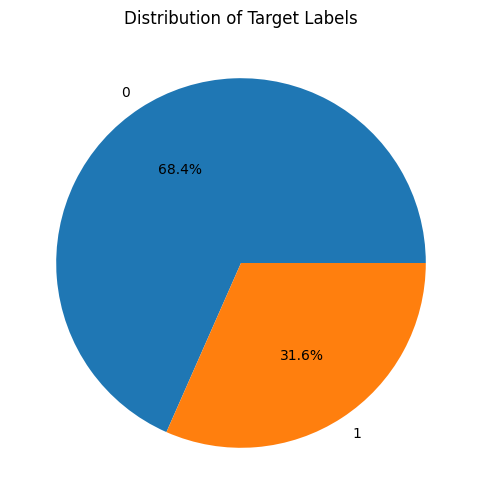

In [19]:
#pie chart of target labels
plt.figure(figsize=(10, 6))
plt.pie(labels_df['Target'].value_counts(), labels=labels_df['Target'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Target Labels')
plt.show()


Now we can merge the train labels with the class info. D

In [20]:
disease_class_df = pd.merge(class_df, labels_df, how='inner', on='patientId')

In [21]:
disease_class_df.head(15)

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
6,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
7,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
8,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0


Definitely Target = 0 is the class of No Lung Opacity / Not Normal or Normal. And Target = 1 = Lung Opacity

In [22]:
disease_class_df.shape

(37629, 7)

However, we see that some records of patient with one id is duplicated. Some records have different bounding boxes , some have different bounding boxes and different labels

In [23]:
class_df_without_patientId = class_df.drop(columns='patientId')
# Concatenate the modified class_df with labels_df side by side (column-wise)
train_df = pd.concat([class_df_without_patientId, labels_df], axis=1)


In [24]:
train_df.shape

(30227, 7)

In [25]:
train_df.head(15)

,class,patientId,x,y,width,height,Target
0,No Lung Opacity / Not Normal,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,No Lung Opacity / Not Normal,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,No Lung Opacity / Not Normal,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,Normal,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,Lung Opacity,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,Lung Opacity,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,No Lung Opacity / Not Normal,00569f44-917d-4c86-a842-81832af98c30,0.0,0.0,0.0,0.0,0
7,No Lung Opacity / Not Normal,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0.0,0.0,0.0,0.0,0
8,Lung Opacity,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,Lung Opacity,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


Now it is okay.

Since all the images have the names of patients ids, we can draw them with bounding boxes. Images stored with dcm extension. We can you pydicom to work with them

In [26]:
import matplotlib.patches as patches
import pydicom as dcm
import math
import matplotlib.pyplot as plt
import numpy as np

def load_dcm_image(patient_id, folder_path):
    """Load DICOM image and metadata for a given patient ID."""
    dcm_file = f'{folder_path}/{patient_id}.dcm'
    dcm_data = dcm.dcmread(dcm_file)
    image = dcm_data.pixel_array
    metadata = {
        "age": dcm_data.PatientAge,
        "sex": dcm_data.PatientSex
    }
    return image, metadata

def draw_bounding_box(ax, data_row):
    """Draw a bounding box on an axis if coordinates are present."""
    if not math.isnan(data_row['x']):
        rect = patches.Rectangle(
            (data_row['x'], data_row['y']),
            data_row['width'], data_row['height'],
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

def plot_image(ax, image, data_row):
    """Plot the DICOM image and add metadata as title."""
    ax.imshow(image, cmap=plt.cm.bone) 
    ax.axis('off')
    ax.set_title(f"ID: {data_row['patientId']}\n"
                 f"Age: {data_row['age']} Sex: {data_row['sex']} "
                 f"Target: {data_row['Target']}\nClass: {data_row['class']}\n"
                 )

def show_image(data, folder_path=dicom_photos_dir):
    """Visualize images with metadata and bounding boxes, dynamically adjusting the plot grid."""
    img_data = list(data.T.to_dict().values())
    num_images = len(img_data)

    # Determine the grid size (rows x columns) for the number of images
    num_cols = int(np.ceil(np.sqrt(num_images)))
    num_rows = int(np.ceil(num_images / num_cols))

    # Create the subplot grid
    f, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 6))
    
    # Flatten the axes array for easy indexing
    ax = ax.flatten()

    for i, data_row in enumerate(img_data):
        image, metadata = load_dcm_image(data_row['patientId'], folder_path)
        data_row.update(metadata)
        plot_image(ax[i], image, data_row)
        draw_bounding_box(ax[i], data_row)

        # Hide any unused subplots
        for j in range(num_images, len(ax)):
            ax[j].axis('off')

    plt.tight_layout()
    plt.show()


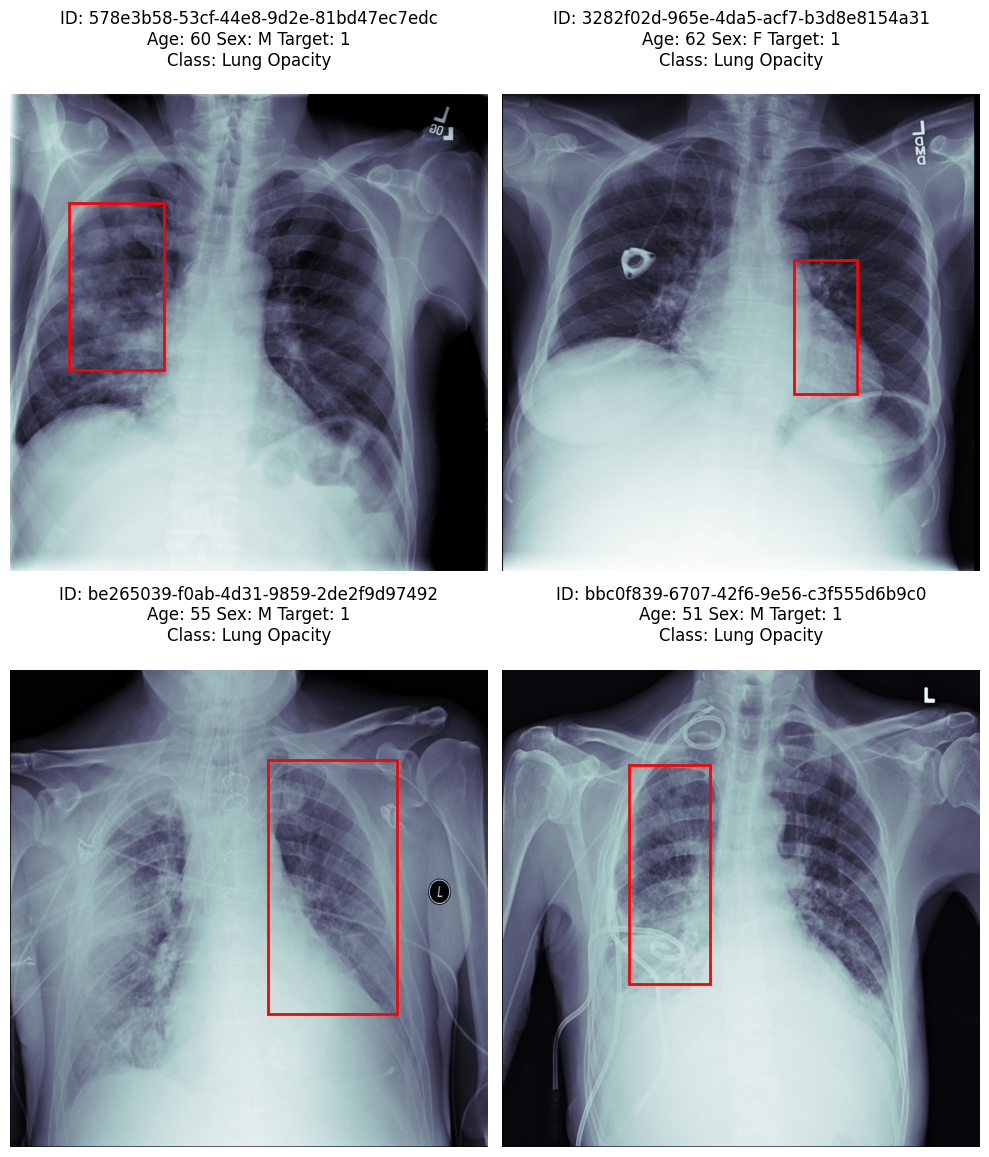

In [27]:
show_image(train_df[train_df['Target']==1].sample(4))

to deal with patients who have multiple boxes I will create a dictionary. The  pneumonia_locations dictionary will contain multiple rows if patient has several boxes. No pneumonai - empty row

In [28]:
import csv
import os

# Initialize an empty dictionary to store pneumonia locations
pneumonia_locations = {}

# Read the CSV file
with open(train_labes_path, mode='r') as infile:
    reader = csv.reader(infile)
    next(reader)  # Skip the header

    for row in reader:
        filename, *location, pneumonia = row

        if pneumonia == '1':
            # Convert location coordinates to integers
            location = [int(float(coord)) for coord in location]

            # Add the location to the dictionary, creating a new list if necessary
            pneumonia_locations.setdefault(filename, []).append(location)


We need to balance the training set for future training

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(20013, 7) training data
(6671, 7) validation data
7998 new training size


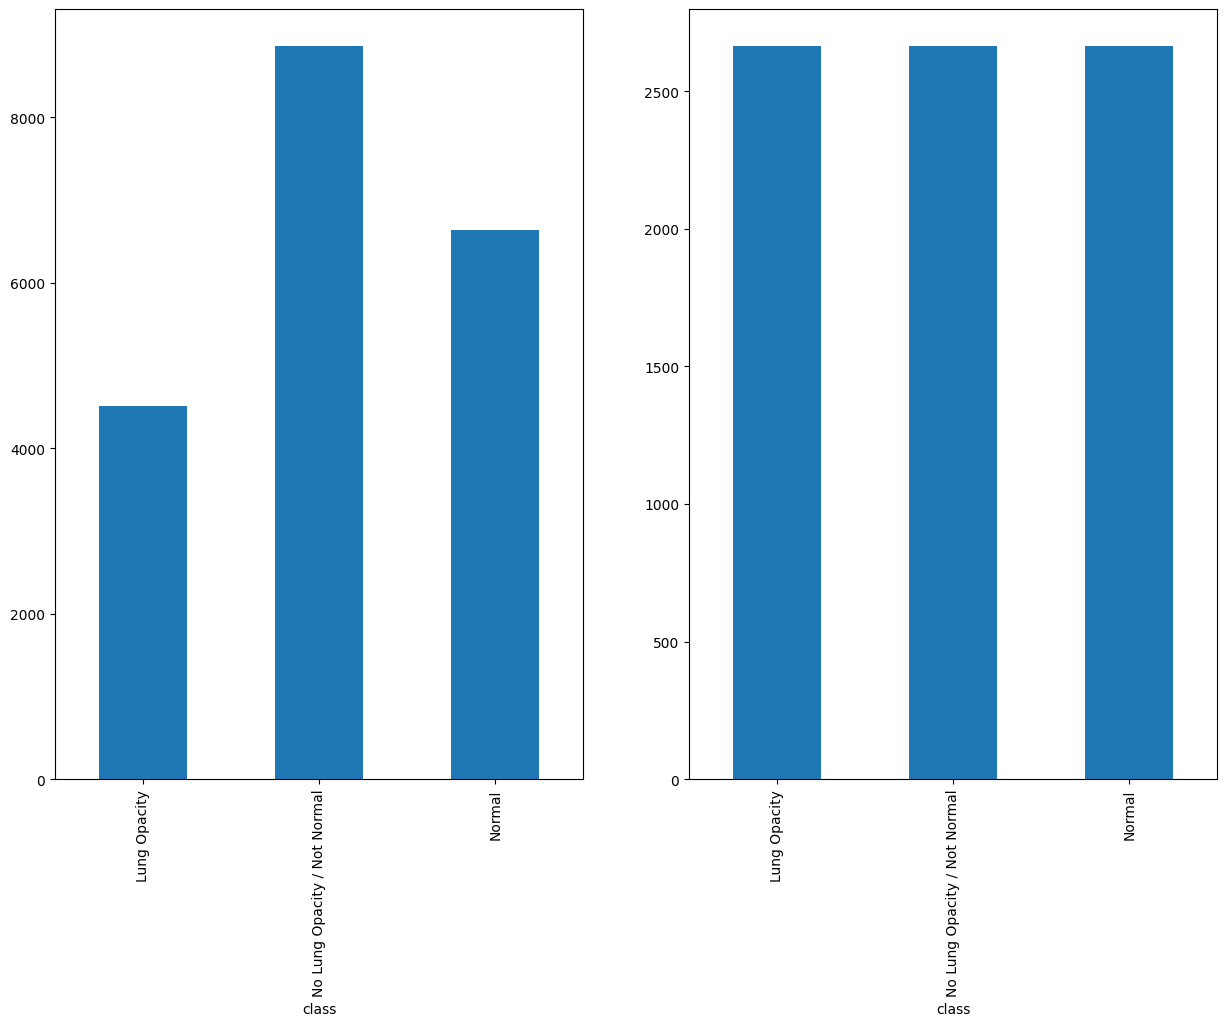

In [29]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming the DataFrame train_df and the constant TRAIN_SAMPLES are defined elsewhere

# Selecting one sample per patient
grouped_df = train_df.groupby('patientId').apply(lambda x: x.sample(1))

# Splitting the data into training and validation sets
raw_train, valid_df = train_test_split(grouped_df, test_size=0.25, random_state=2018, stratify=grouped_df['class'])

# Printing the shapes of the training and validation data
print(f"{raw_train.shape} training data")
print(f"{valid_df.shape} validation data")

# Setting up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plotting class distribution in the raw training data
raw_train.groupby('class').size().plot.bar(ax=axes[0])

# Balancing the classes in the training data
balanced_train_df = raw_train.groupby('class').apply(lambda x: x.sample(8000 // 3)).reset_index(drop=True)

# Plotting class distribution in the balanced training data
balanced_train_df.groupby('class').size().plot.bar(ax=axes[1])

# Printing the new size of the training data
print(f"{balanced_train_df.shape[0]} new training size")


In [30]:
raw_train.head()

,,class,patientId,x,y,width,height,Target
patientId,,,,,,,,
dff0a453-6507-489b-b524-41031c1306d9,24943,No Lung Opacity / Not Normal,dff0a453-6507-489b-b524-41031c1306d9,0.0,0.0,0.0,0.0,0
ac36c55b-581a-4af8-bbf6-2334f565ce06,18183,Normal,ac36c55b-581a-4af8-bbf6-2334f565ce06,0.0,0.0,0.0,0.0,0
c4f725aa-6f37-45ef-8e0f-f32882fad4b3,21705,No Lung Opacity / Not Normal,c4f725aa-6f37-45ef-8e0f-f32882fad4b3,0.0,0.0,0.0,0.0,0
7d44f498-340f-4afd-b5f4-f35a7124b35f,12236,No Lung Opacity / Not Normal,7d44f498-340f-4afd-b5f4-f35a7124b35f,0.0,0.0,0.0,0.0,0
76c77e8d-bfc4-47b9-bffd-0d136fa06302,11417,Lung Opacity,76c77e8d-bfc4-47b9-bffd-0d136fa06302,328.0,509.0,124.0,111.0,1


After the data balanced, we need to have a data loader which will take in some parameters like filename,batch_size and so on. It will output a shuffled batch of images as numpy arrays and masks. It is efficient because dataset is too large and data loader will load images on the go

In [31]:
import os
import random
import numpy as np
import pydicom
from skimage.transform import resize
import keras

class ImageProcessor(keras.utils.Sequence):

    def __init__(self, directory, image_files, lung_abnormalities=None, batch_sz=32, img_dim=512, randomize=True, enhance=False, mode_predict=False):
        self.directory = directory
        self.image_files = image_files
        self.lung_abnormalities = lung_abnormalities
        self.batch_sz = batch_sz
        self.img_dim = img_dim
        self.randomize = randomize
        self.enhance = enhance
        self.mode_predict = mode_predict
        self._on_epoch_end()
    
    def _load_image(self, file_name):
        # Load DICOM file
        image = pydicom.dcmread(os.path.join(self.directory, file_name)).pixel_array
        # Initialize mask
        mask = np.zeros(image.shape)
        # File name without extension
        file_name_wo_ext = file_name.split('.')[0]
        # Check for lung abnormalities
        if file_name_wo_ext in self.lung_abnormalities:
            for location in self.lung_abnormalities[file_name_wo_ext]:
                x, y, width, height = location
                mask[y:y+height, x:x+width] = 1
        # Augmentation: horizontal flip
        if self.enhance and random.random() > 0.6:
            image = np.fliplr(image)
            mask = np.fliplr(mask)
        # Resize image and mask
        image = resize(image, (self.img_dim, self.img_dim), mode='reflect')
        mask = resize(mask, (self.img_dim, self.img_dim), mode='reflect') > 0.55
        # Add channel dimension
        image = np.expand_dims(image, -1)
        mask = np.expand_dims(mask, -1)
        return image, mask
    
    def _load_for_prediction(self, file_name):
        # Load DICOM file
        image = pydicom.dcmread(os.path.join(self.directory, file_name)).pixel_array
        # Resize image
        image = resize(image, (self.img_dim, self.img_dim), mode='reflect')
        # Add channel dimension
        image = np.expand_dims(image, -1)
        return image
        
    def __getitem__(self, index):
        # Select batch
        batch_files = self.image_files[index*self.batch_sz:(index+1)*self.batch_sz]
        # Prediction mode
        if self.mode_predict:
            images = [self._load_for_prediction(file_name) for file_name in batch_files]
            images = np.array(images)
            return images, batch_files
        # Training mode
        else:
            items = [self._load_image(file_name) for file_name in batch_files]
            images, masks = zip(*items)
            images = np.array(images)
            masks = np.array(masks)
            return images, masks
        
    def _on_epoch_end(self):
        if self.randomize:
            random.shuffle(self.image_files)
        
    def __len__(self):
        if self.mode_predict:
            return int(np.ceil(len(self.image_files) / self.batch_sz))
        else:
            return int(len(self.image_files) / self.batch_sz)


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, UpSampling2D, Add, Input

def create_downsampling_layer(num_filters):
    """
    Creates a downsampling layer.
    """
    def layer(input_tensor):
        x = BatchNormalization(momentum=0.9)(input_tensor)
        x = LeakyReLU(0)(x)
        x = Conv2D(num_filters, 1, padding='same', use_bias=False)(x)
        x = MaxPooling2D((2, 2))(x)
        return x
    return layer

def create_residual_block(num_filters):
    """
    Creates a residual block.
    """
    def layer(input_tensor):
        shortcut = input_tensor
        x = BatchNormalization(momentum=0.95)(input_tensor)
        x = LeakyReLU(0)(x)
        x = Conv2D(num_filters, 3, padding='same', use_bias=False)(x)
        x = BatchNormalization(momentum=0.95)(x)
        x = LeakyReLU(0)(x)
        x = Conv2D(num_filters, 3, padding='same', use_bias=False)(x)
        x = Add()([x, shortcut])
        return x
    return layer

def create_cnn(image_size, initial_filters, num_residual_blocks=2, num_downsampling_layers=3):
    inputs = Input(shape=(image_size, image_size, 1))
    x = Conv2D(initial_filters, 3, padding='same', use_bias=False)(inputs)

    # Adding downsampling and residual blocks
    for d in range(num_downsampling_layers):
        filter_count = initial_filters * (2 ** d)
        x = create_downsampling_layer(filter_count)(x)
        for _ in range(num_residual_blocks):
            x = create_residual_block(filter_count)(x)

    # Output layers
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(0)(x)
    x = Conv2D(1, 1, activation='sigmoid')(x)
    x = UpSampling2D(2 ** num_downsampling_layers)(x)

    # Create the model
    model = Model(inputs=inputs, outputs=x)

    return model


Here is the breakdown of this model


1. Initial Convolution Layer: The model starts with a standard 2D convolution layer (Conv2D) that processes the input image.
1. Downsampling and Residual Blocks:  The model then alternates between downsampling layers and a series of residual blocks, repeated num_downsampling_layers times.

Each downsampling layer consists of Batch Normalization, LeakyReLU activation, a 1x1 Conv2D layer for channel adjustment, and a MaxPooling layer to reduce the spatial dimensions by half. This process effectively compresses the input, focusing on the most important features while reducing computation for deeper layers.

Each residual block further processes the data using two sets of Batch Normalization, LeakyReLU activation, and 3x3 Conv2D layers.
The output of the second Conv2D layer is added to the original input of the residual block (a shortcut connection), which helps in mitigating the vanishing gradient problem and allows deeper models to be trained effectively.
1. After the downsampling and residual blocks, the model applies another set of Batch Normalization and LeakyReLU. An UpSampling2D layer then upscales the output back to the original input size. The factor for upsampling is 2 ** num_downsampling_layers, reversing the spatial dimension reduction done by the MaxPooling layers.


However we still can not train it because we need some specific metrics. For bounding boxes we gotta use IoU metrics along with IoU_mean to track the metrics. We have to code them manually because I could not find the already implemented versions :)

In [210]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_107 (Conv2D)         (None, 256, 256, 25)         225       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_101 (B  (None, 256, 256, 25)         100       ['conv2d_107[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 leaky_re_lu_101 (LeakyReLU  (None, 256, 256, 25)         0         ['batch_normalization_10

In [33]:
import tensorflow as tf

def inverse_iou(y_true, y_pred):
    """
    Calculate the Inverse of Intersection over Union (IoU) score.

    Parameters:
    y_true (tensor): The ground truth labels.
    y_pred (tensor): The predicted labels.

    Returns:
    float: The Inverse IoU score.
    """
    # Flatten the input tensors
    # Convert y_true and y_pred to float32 if they are not already
    y_true_flat = tf.cast(tf.reshape(y_true, [-1]), tf.float32)
    y_pred_flat = tf.cast(tf.reshape(y_pred, [-1]), tf.float32)

    # Calculate the intersection
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)

    # Calculate the union
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) - intersection

    # Calculate the IoU score
    iou_score = (intersection + 1.0) / (union + 1.0)

    # Return the inverse IoU score
    return 1.0 - iou_score


def calculate_mean_iou(y_true, y_pred):
    """
    Calculate the mean Intersection over Union (IoU) for batched data.

    Parameters:
    y_true (tensor): The ground truth labels.
    y_pred (tensor): The predicted labels.

    Returns:
    float: The mean IoU score for the batch.
    """
    # Round the predictions to 0 or 1
    y_pred_rounded = tf.round(y_pred)

    # Calculate the intersection
    intersection = tf.reduce_sum(y_true * y_pred_rounded, axis=[1, 2, 3])

    # Calculate the union
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred_rounded, axis=[1, 2, 3])

    # Calculate smooth factor to avoid division by zero
    smooth_factor = tf.ones(tf.shape(intersection))

    # Compute the mean IoU
    mean_iou_value = tf.reduce_mean((intersection + smooth_factor) / (union - intersection + smooth_factor))

    return mean_iou_value


Now we can actually train our model and see the result. Also I'm gonna use exponential decay for learning rate and RSMprop optimizer

Also to make generator work we need to get filenames but I want to have balanced classes. So im gonna access it by train dataframe's column PatientId

In [34]:
import os
import random

# Extract PatientId values as filenames and add the file extension (e.g., .dcm) if needed
train_filenames = [f"{pid}.dcm" for pid in raw_train['patientId']]
valid_filenames = [f"{pid}.dcm" for pid in valid_df['patientId']]

#Fix 1: Have to ensure all files exist with this names

It will train for a long time so I will also add a callback method

In [35]:
import numpy as np
import tensorflow as tf

class CosineAnnealingLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, initial_lr, max_epochs, min_lr=0):
        super().__init__()
        self.initial_lr = initial_lr
        self.max_epochs = max_epochs
        self.min_lr = min_lr

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Calculate the new learning rate based on cosine annealing
        new_lr = self.min_lr + (self.initial_lr - self.min_lr) * (1 + np.cos(np.pi * epoch / self.max_epochs)) / 2
        # Set the new learning rate to the optimizer
        tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
        


initial_learning_rate = 0.001
max_epochs = 20
learning_rate_scheduler = CosineAnnealingLearningRateScheduler(initial_learning_rate, max_epochs)



In [49]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay


# Define learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = RMSprop(learning_rate=lr_schedule)
image_size = 256


model = create_cnn(image_size=256, initial_filters=25, num_residual_blocks=2, num_downsampling_layers=3)
model.compile(optimizer=RMSprop(learning_rate=lr_schedule),
                  loss=inverse_iou,
                  metrics=['accuracy', calculate_mean_iou])



# create train and validation generators

train_gen = ImageProcessor(dicom_photos_dir, train_filenames, pneumonia_locations, batch_sz=32, img_dim=256, randomize=True, enhance=True, mode_predict=False)
valid_gen = ImageProcessor(dicom_photos_dir, valid_filenames, pneumonia_locations, batch_sz=32, img_dim=256, randomize=False, mode_predict=False)

first_model = model.fit(train_gen, validation_data=valid_gen, callbacks=[learning_rate_scheduler], epochs=3, shuffle=True)

Epoch 1/3
625/625 [==============================] - 1657s 3s/step - loss: 0.8304 - accuracy: 0.9325 - calculate_mean_iou: 0.4641 - val_loss: 0.8815 - val_accuracy: 0.9733 - val_calculate_mean_iou: 0.7072
Epoch 2/3
625/625 [==============================] - 1577s 3s/step - loss: 0.7547 - accuracy: 0.9637 - calculate_mean_iou: 0.5845 - val_loss: 0.7528 - val_accuracy: 0.9585 - val_calculate_mean_iou: 0.5421
Epoch 3/3
625/625 [==============================] - 1626s 3s/step - loss: 0.7282 - accuracy: 0.9665 - calculate_mean_iou: 0.6181 - val_loss: 0.7460 - val_accuracy: 0.9591 - val_calculate_mean_iou: 0.5411


Save the model

In [66]:
first_model.model.save('hihi.h5')

Let's look at the metrics

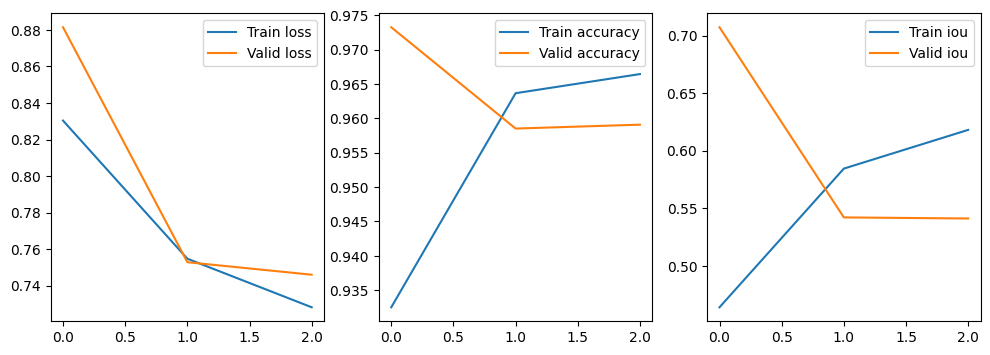

In [67]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(first_model.epoch, first_model.history["loss"], label="Train loss")
plt.plot(first_model.epoch, first_model.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(first_model.epoch, first_model.history["accuracy"], label="Train accuracy")
plt.plot(first_model.epoch, first_model.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(first_model.epoch, first_model.history["calculate_mean_iou"], label="Train iou")
plt.plot(first_model.epoch, first_model.history["val_calculate_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

Now Let's save the csv files with predictions

In [77]:
dirr = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images'
test_files = os.listdir(dirr)
print('n test samples:', len(test_files))

# create test generator with predict flag set to True
test_set = ImageProcessor(dirr, test_files, None, batch_sz=25, img_dim=256, randomize=False, mode_predict=True)

n test samples: 3000


In [98]:
import os
import cv2
import numpy as np
import pandas as pd

dirr = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images'
test_files = os.listdir(dirr)
print('n test samples:', len(test_files))

# Assuming ImageProcessor is a class you have defined elsewhere
test_set = ImageProcessor(dirr, test_files, None, batch_sz=25, img_dim=256, randomize=False, mode_predict=True)

# Initialize result dictionary
result_dict = {}

# Iterate through the dataset
for batch_images, file_names in test_set:
    # Generate predictions for a batch of images
    predictions = model.predict(batch_images)

    # Process each prediction in the batch

    for prediction, file_name in zip(predictions, file_names):
        # Resize the predicted mask using OpenCV
        resized_pred = cv2.resize(prediction, (1024, 1024))

        # Check if the prediction is a grayscale image (2D array)
        if len(resized_pred.shape) == 2:
            # If it's a grayscale image, no need to index for channel
            _, binary_mask = cv2.threshold(resized_pred, 0.5, 1, cv2.THRESH_BINARY)
        else:
            # If it's a 3D array, index the first channel
            _, binary_mask = cv2.threshold(resized_pred[:, :, 0], 0.5, 1, cv2.THRESH_BINARY)

        # Find contours from the binary mask
        contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        # Initialize string to store bounding box data
        bbox_string = ''

        # Calculate bounding boxes for each contour
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            box_height = h
            box_width = w

            # Compute confidence score
            confidence = np.mean(resized_pred[y:y+box_height, x:x+box_width])

            # Append bounding box data to the string
            bbox_string += f'{confidence} {x} {y} {box_width} {box_height} '

        # Remove file extension and add results to dictionary
        file_name_key = file_name.split('.')[0]
        result_dict[file_name_key] = bbox_string

    # Check if all filenames are processed
    if len(result_dict) >= len(test_files):  # Assuming test_files is what you meant here
        break

# Convert the results dictionary to a DataFrame
result_dataframe = pd.DataFrame.from_dict(result_dict, orient='index')
result_dataframe.index.names = ['patientId']
result_dataframe.columns = ['PredictionString']

# Save the DataFrame to a CSV file
result_dataframe.to_csv('result_submission.csv')


n test samples: 3000
1/1 [==============================] - 0s 23ms/step


let's look at some predicted boxes

In [169]:
# First, filter the DataFrame to include only rows where 'Target' equals 1
filtered_df = train_df[train_df['Target'] == 1]
unique_pneumonia_cases = filtered_df.drop_duplicates(subset='patientId')

pneumonia_cases = unique_pneumonia_cases.sample(4)

pneumonia_file_names = [f"{patient_id}.dcm" for patient_id in pneumonia_cases['patientId'].tolist()]

pneumonia_gen = ImageProcessor(dicom_photos_dir, pneumonia_file_names, None, batch_sz=32, img_dim=256, randomize=False, mode_predict=True)

# Generate predictions
pneumonia_predictions = []
for i in range(len(pneumonia_gen)):
    batch_images, _ = pneumonia_gen[i]
    batch_predictions = model.predict(batch_images)
    pneumonia_predictions.extend(batch_predictions)





1/1 [==============================] - 0s 20ms/step


In [170]:
pneumonia_cases

,class,patientId,x,y,width,height,Target
13201,Lung Opacity,854290ba-d47b-457b-949e-c86f0e7e5143,604.0,171.0,222.0,391.0,1
3736,Lung Opacity,3a4bdc29-1bbf-4dd9-9fe7-00c42a081bc1,558.0,334.0,246.0,433.0,1
20664,Lung Opacity,bc9683bf-595d-497e-8c99-ac9baed1a2eb,99.0,561.0,221.0,157.0,1
13204,Lung Opacity,85444c90-e9d1-42cf-8ac4-f9968d27473d,654.0,200.0,300.0,528.0,1


In [171]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom as dcm

def show_images_with_predictions(pneumonia_cases, pneumonia_predictions, folder_path):
    num_samples = len(pneumonia_cases)
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted figsize for better visualization

    counter = 0  # Initialize a simple counter
    for _, row in pneumonia_cases.iterrows():
        patient_id = row['patientId']
        dcm_path = os.path.join(folder_path, f"{patient_id}.dcm")
        dcm_data = dcm.dcmread(dcm_path)
        image = dcm_data.pixel_array

        # Plot image with predicted bounding boxes
        axs[counter].imshow(image, cmap='gray')
        get_contours(axs[counter], pneumonia_predictions[counter])  # Corrected index for axs
        axs[counter].set_title(f"Predicted Bounding Box - {patient_id}")
        axs[counter].axis('off')

        counter += 1  # Increment the counter
        if counter >= 4:  # Stop after 4 images
            break

    plt.tight_layout()
    plt.show()


In [172]:
def get_contours(ax, prediction):
    # Assuming 'prediction' is a single prediction mask
    # Resize the predicted mask using OpenCV
    resized_pred = cv2.resize(prediction, (1024, 1024))

    if len(resized_pred.shape) == 2:
        _, binary_mask = cv2.threshold(resized_pred, 0.5, 1, cv2.THRESH_BINARY)
    else:
        _, binary_mask = cv2.threshold(resized_pred[:, :, 0], 0.5, 1, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

    if contours:
        return cv2.boundingRect(contours[0])  # Return the first contour's bounding box
    return None


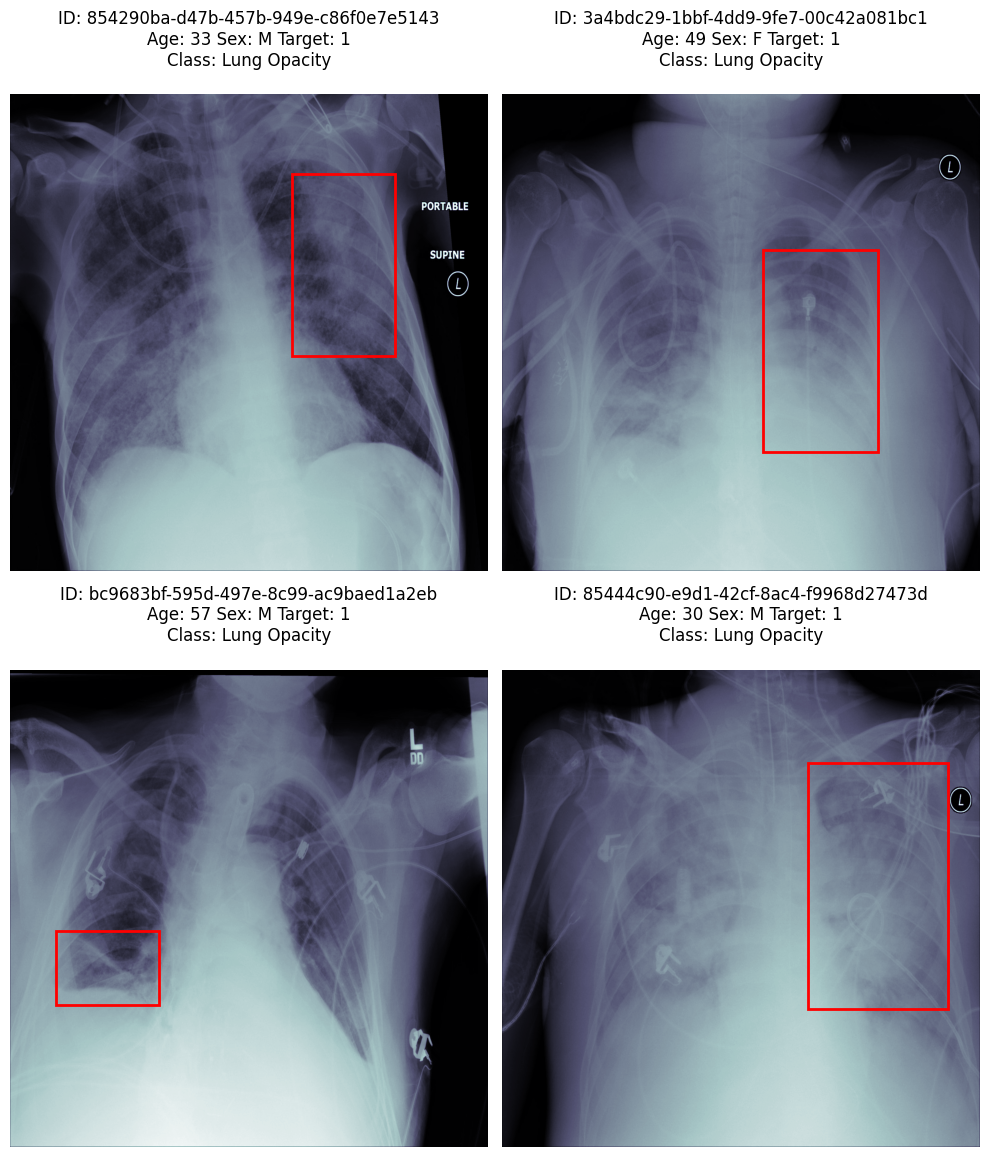

In [173]:
show_image(pneumonia_cases)

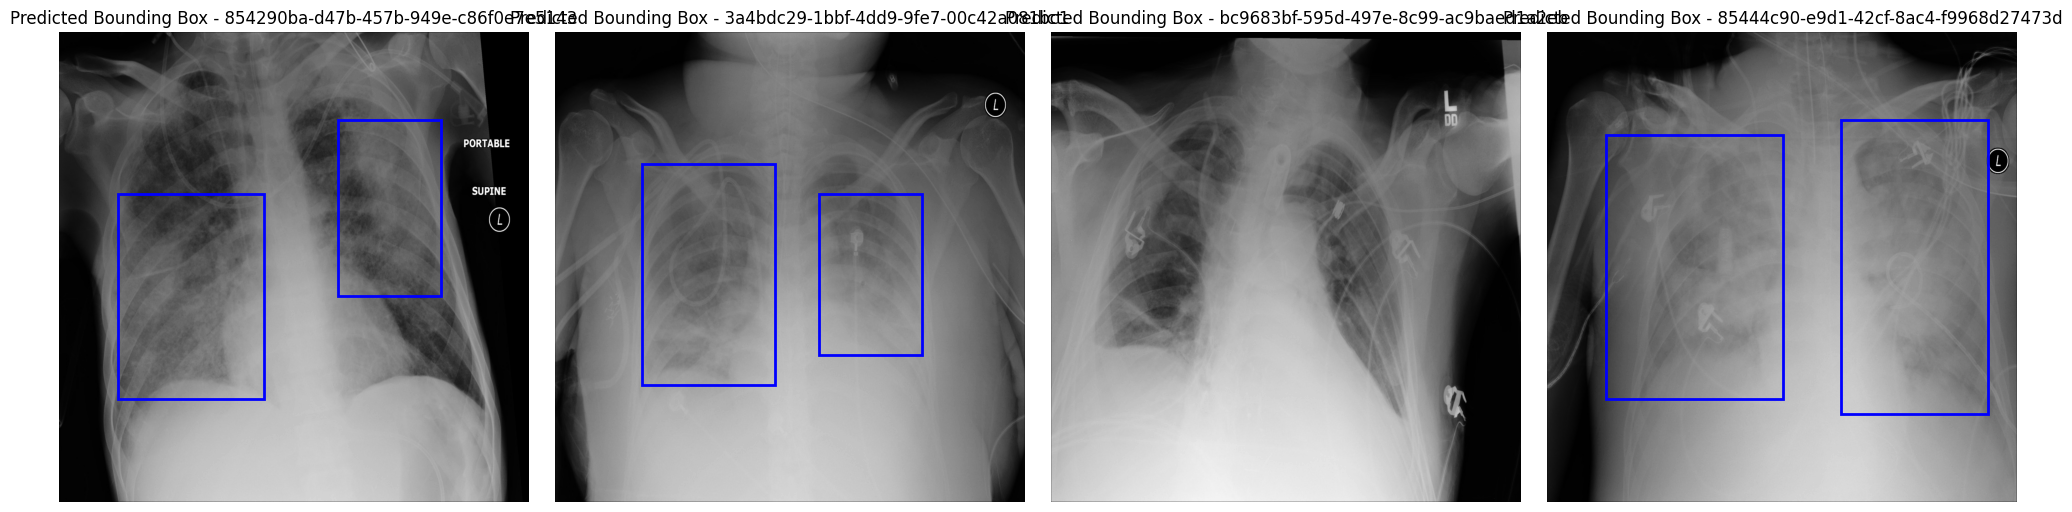

In [174]:
# Call the function with the selected pneumonia predictions
show_images_with_predictions(pneumonia_cases, pneumonia_predictions, dicom_photos_dir)


As we can see the model predicts sometime two boxes while we only have 1 and sometimes it does not detect any. Very sad :(